## Covid-19 현황 분석
공공데이터에 201202 오픈API신청했는데 익일안됨..  
워드카운트 비슷.  
딕셔너리 사용하기/  
하루하루> 10일> 1달치> 전체  (2020.3월~11월)  


하루치 확인해서  
데이터프레임 만들기  
딕셔너리를 리스트로 만들어서,  한방에 17개를 넣어 데이터프레임을 만들수  
for if elif*17개는 아니다아니다  

dict_list = []  
for 날짜:  
	a_dict={일자 딕셔너리만들고  
	인터넷에서 데이터를 읽어서  
	for   
		지역별로  
		넘버 값을 채워넣고  
		  
	딕셔너리 어펜드  
데이터프레임을 만드는 방법 dict_list   

날짜별로  

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [10]:
key_fd = open('gov_data_api_key.txt', mode='r')
govapi_key = key_fd.read(100)
key_fd.close()

In [11]:
start_date = '20201130'
end_date = '20201130'

In [12]:
corona_url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson'
url = f'{corona_url}?ServiceKey={govapi_key}&pageNo=1&numOfRows=10&startCreateDt={start_date}&endCreateDt={end_date}'

In [13]:
result = requests.get(url)
soup = BeautifulSoup(result.text, 'xml')
soup.find('resultCode').get_text()

'00'

In [14]:
soup.find('resultMsg').string  

'NORMAL SERVICE.'

In [15]:
result.text

'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><createDt>2020-11-30 14:29:36.528</createDt><deathCnt>0</deathCnt><defCnt>21301</defCnt><gubun>검역</gubun><gubunCn>隔離區</gubunCn><gubunEn>Lazaretto</gubunEn><incDec>10</incDec><isolClearCnt>1618</isolClearCnt><isolIngCnt>512</isolIngCnt><localOccCnt>0</localOccCnt><overFlowCnt>10</overFlowCnt><qurRate>-</qurRate><seq>6030</seq><stdDay>2020년 11월 30일 00시</stdDay><updateDt>null</updateDt></item><item><createDt>2020-11-30 14:29:36.528</createDt><deathCnt>0</deathCnt><defCnt>2130</defCnt><gubun>검역</gubun><gubunCn>隔離區</gubunCn><gubunEn>Lazaretto</gubunEn><incDec>10</incDec><isolClearCnt>1618</isolClearCnt><isolIngCnt>512</isolIngCnt><localOccCnt>0</localOccCnt><overFlowCnt>10</overFlowCnt><qurRate>-</qurRate><seq>6030</seq><stdDay>2020년 11월 30일 00시</stdDay><updateDt>2020-11-30 15:33:34.427</updateDt></item><item><createDt>2020-11

In [50]:
title_list = soup.find_all('gubun')

In [51]:
title[2].get_text()

'제주'

In [47]:
gubun_list = []
for n in title_list:
    title = title[n].get_text()
    gubun_list.append(title)

In [49]:
df = pd.DataFrame({
    '지역': gubun_list
})
df.head()

,지역


In [ ]:
item find if else''

In [37]:
title

[<gubun>검역</gubun>,
 <gubun>검역</gubun>,
 <gubun>제주</gubun>,
 <gubun>경남</gubun>,
 <gubun>경북</gubun>,
 <gubun>전남</gubun>,
 <gubun>전북</gubun>,
 <gubun>충남</gubun>,
 <gubun>충북</gubun>,
 <gubun>강원</gubun>,
 <gubun>경기</gubun>,
 <gubun>세종</gubun>,
 <gubun>울산</gubun>,
 <gubun>대전</gubun>,
 <gubun>광주</gubun>,
 <gubun>인천</gubun>,
 <gubun>대구</gubun>,
 <gubun>부산</gubun>,
 <gubun>서울</gubun>,
 <gubun>합계</gubun>,
 <gubun>합계</gubun>]

In [58]:
soup.find_all('item').get_text()

AttributeError: ResultSet object has no attribute 'get_text'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

In [27]:
df = pd.read_csv('./results/전국코로나일별.csv', encoding='utf-8')
df.head()

,date,서울,부산,대구,인천,대전,광주,울산,세종,경기,강원,충북,충남,경북,경남,전북,전남,제주,합계
0,2020-03-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-03-02,10,3,469,0,0,0,3,0,7,8,1,13,67,4,1,0,0,586
2,2020-03-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-03-04,1,3,405,2,1,2,3,0,7,1,0,1,89,1,0,0,0,516
4,2020-03-05,4,-1,321,0,1,1,0,0,9,2,1,4,87,9,0,-1,1,438


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    275 non-null    object
 1   서울      275 non-null    int64 
 2   부산      275 non-null    int64 
 3   대구      275 non-null    int64 
 4   인천      275 non-null    int64 
 5   대전      275 non-null    int64 
 6   광주      275 non-null    int64 
 7   울산      275 non-null    int64 
 8   세종      275 non-null    int64 
 9   경기      275 non-null    int64 
 10  강원      275 non-null    int64 
 11  충북      275 non-null    int64 
 12  충남      275 non-null    int64 
 13  경북      275 non-null    int64 
 14  경남      275 non-null    int64 
 15  전북      275 non-null    int64 
 16  전남      275 non-null    int64 
 17  제주      275 non-null    int64 
 18  합계      275 non-null    int64 
dtypes: int64(18), object(1)
memory usage: 40.9+ KB


In [29]:
#에러 df['date'] = df['date'].astype(datetime64) date의 데이터타입을 object에서 datetime64로바꿀까했지만 안되네ㅠㅠ
#확진일 컬럼추가. datetime으로
df['확진일'] = pd.to_datetime(df['date'])
df['date'].head()

0    2020-03-01
1    2020-03-02
2    2020-03-03
3    2020-03-04
4    2020-03-05
Name: date, dtype: object

In [30]:
df.head()  #맨뒤에 컬럼추가됨 확인

,date,서울,부산,대구,인천,대전,광주,울산,세종,경기,강원,충북,충남,경북,경남,전북,전남,제주,합계,확진일
0,2020-03-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020-03-01
1,2020-03-02,10,3,469,0,0,0,3,0,7,8,1,13,67,4,1,0,0,586,2020-03-02
2,2020-03-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020-03-03
3,2020-03-04,1,3,405,2,1,2,3,0,7,1,0,1,89,1,0,0,0,516,2020-03-04
4,2020-03-05,4,-1,321,0,1,1,0,0,9,2,1,4,87,9,0,-1,1,438,2020-03-05


In [31]:
#datetime'확진일'컬럼을 인덱스로지정
df.set_index('확진일', inplace=True)
df.head()

,date,서울,부산,대구,인천,대전,광주,울산,세종,경기,강원,충북,충남,경북,경남,전북,전남,제주,합계
확진일,,,,,,,,,,,,,,,,,,,
2020-03-01,2020-03-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-02,2020-03-02,10,3,469,0,0,0,3,0,7,8,1,13,67,4,1,0,0,586
2020-03-03,2020-03-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-04,2020-03-04,1,3,405,2,1,2,3,0,7,1,0,1,89,1,0,0,0,516
2020-03-05,2020-03-05,4,-1,321,0,1,1,0,0,9,2,1,4,87,9,0,-1,1,438


In [32]:
del df['date'] #컬럼삭제
corona_raw = df #변수명변경
corona_raw.head()

,서울,부산,대구,인천,대전,광주,울산,세종,경기,강원,충북,충남,경북,경남,전북,전남,제주,합계
확진일,,,,,,,,,,,,,,,,,,
2020-03-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-02,10,3,469,0,0,0,3,0,7,8,1,13,67,4,1,0,0,586
2020-03-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-04,1,3,405,2,1,2,3,0,7,1,0,1,89,1,0,0,0,516
2020-03-05,4,-1,321,0,1,1,0,0,9,2,1,4,87,9,0,-1,1,438


In [33]:
# -1을 어떻게 처리할것인가... 0으로 바꿔?
corona_raw[corona_raw < 0] = 0
corona_raw.head()

,서울,부산,대구,인천,대전,광주,울산,세종,경기,강원,충북,충남,경북,경남,전북,전남,제주,합계
확진일,,,,,,,,,,,,,,,,,,
2020-03-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-02,10,3,469,0,0,0,3,0,7,8,1,13,67,4,1,0,0,586
2020-03-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-04,1,3,405,2,1,2,3,0,7,1,0,1,89,1,0,0,0,516
2020-03-05,4,0,321,0,1,1,0,0,9,2,1,4,87,9,0,0,1,438


In [34]:
#월로묶기 resample('M) #확진일은 대표값;
corona = corona_raw.resample('M').sum()
corona

,서울,부산,대구,인천,대전,광주,울산,세종,경기,강원,충북,충남,경북,경남,전북,전남,제주,합계
확진일,,,,,,,,,,,,,,,,,,
2020-03-31,362,34,3552,57,23,10,22,45,389,24,34,60,682,36,7,5,6,5343
2020-04-30,183,18,168,29,5,10,4,0,200,17,1,15,65,21,5,6,4,750
2020-05-31,228,10,31,113,6,2,9,1,164,4,15,3,14,6,3,4,2,615
2020-06-30,452,7,23,135,71,12,3,3,367,8,5,22,10,11,6,5,4,1144
2020-07-31,288,17,34,42,49,160,4,0,339,9,9,23,12,25,12,14,7,1044
2020-08-31,2267,130,107,335,90,170,30,17,1714,115,55,142,54,77,48,104,19,5474
2020-09-30,1424,120,85,200,105,121,58,9,1123,35,43,152,96,55,41,27,14,3708
2020-10-31,719,171,42,129,82,16,16,6,1020,55,18,57,36,25,38,16,0,2446
2020-11-30,2802,217,58,365,52,185,35,18,1875,373,138,358,117,309,168,239,21,7330


In [35]:
#확진일을 월인덱스변경
corona.index = ['3월','4월','5월','6월','7월','8월','9월','10월','11월']
corona

,서울,부산,대구,인천,대전,광주,울산,세종,경기,강원,충북,충남,경북,경남,전북,전남,제주,합계
3월,362,34,3552,57,23,10,22,45,389,24,34,60,682,36,7,5,6,5343
4월,183,18,168,29,5,10,4,0,200,17,1,15,65,21,5,6,4,750
5월,228,10,31,113,6,2,9,1,164,4,15,3,14,6,3,4,2,615
6월,452,7,23,135,71,12,3,3,367,8,5,22,10,11,6,5,4,1144
7월,288,17,34,42,49,160,4,0,339,9,9,23,12,25,12,14,7,1044
8월,2267,130,107,335,90,170,30,17,1714,115,55,142,54,77,48,104,19,5474
9월,1424,120,85,200,105,121,58,9,1123,35,43,152,96,55,41,27,14,3708
10월,719,171,42,129,82,16,16,6,1020,55,18,57,36,25,38,16,0,2446
11월,2802,217,58,365,52,185,35,18,1875,373,138,358,117,309,168,239,21,7330


In [36]:
coronaT = corona.T
coronaT

,3월,4월,5월,6월,7월,8월,9월,10월,11월
서울,362,183,228,452,288,2267,1424,719,2802
부산,34,18,10,7,17,130,120,171,217
대구,3552,168,31,23,34,107,85,42,58
인천,57,29,113,135,42,335,200,129,365
대전,23,5,6,71,49,90,105,82,52
광주,10,10,2,12,160,170,121,16,185
울산,22,4,9,3,4,30,58,16,35
세종,45,0,1,3,0,17,9,6,18
경기,389,200,164,367,339,1714,1123,1020,1875
강원,24,17,4,8,9,115,35,55,373


In [37]:
coronaT['합계'] = coronaT.sum(axis=1)
coronaT

,3월,4월,5월,6월,7월,8월,9월,10월,11월,합계
서울,362,183,228,452,288,2267,1424,719,2802,8725
부산,34,18,10,7,17,130,120,171,217,724
대구,3552,168,31,23,34,107,85,42,58,4100
인천,57,29,113,135,42,335,200,129,365,1405
대전,23,5,6,71,49,90,105,82,52,483
광주,10,10,2,12,160,170,121,16,185,686
울산,22,4,9,3,4,30,58,16,35,181
세종,45,0,1,3,0,17,9,6,18,99
경기,389,200,164,367,339,1714,1123,1020,1875,7191
강원,24,17,4,8,9,115,35,55,373,640


In [38]:
coronaT = coronaT.iloc[:-1,:]
coronaT

,3월,4월,5월,6월,7월,8월,9월,10월,11월,합계
서울,362,183,228,452,288,2267,1424,719,2802,8725
부산,34,18,10,7,17,130,120,171,217,724
대구,3552,168,31,23,34,107,85,42,58,4100
인천,57,29,113,135,42,335,200,129,365,1405
대전,23,5,6,71,49,90,105,82,52,483
광주,10,10,2,12,160,170,121,16,185,686
울산,22,4,9,3,4,30,58,16,35,181
세종,45,0,1,3,0,17,9,6,18,99
경기,389,200,164,367,339,1714,1123,1020,1875,7191
강원,24,17,4,8,9,115,35,55,373,640


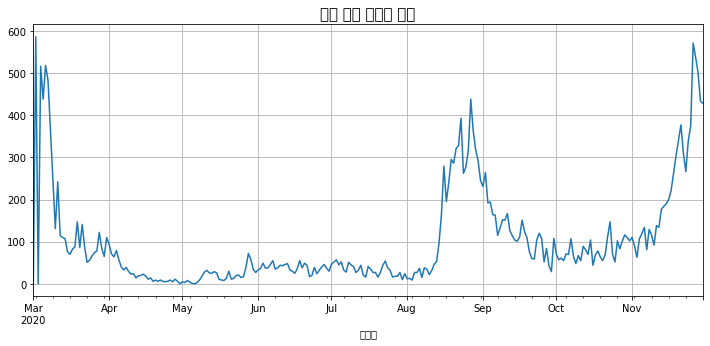

In [41]:
import matplotlib.pyplot as plt 
corona_raw['합계'].plot(grid=True, figsize=(12,5))
plt.title('전국 일별 확진자 추이', fontsize=15)
plt.show()

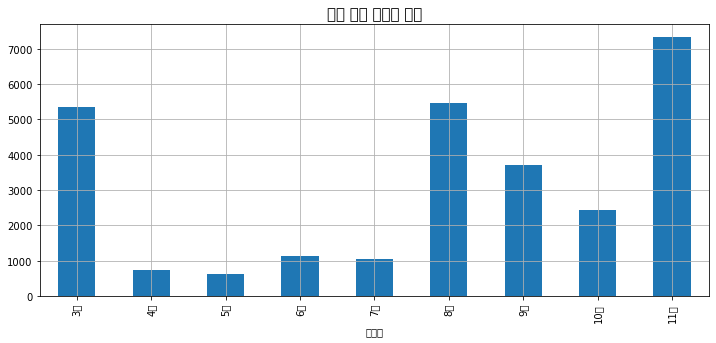

In [43]:
#월별은 바그래프로
corona['합계'].plot(kind='bar', grid=True, figsize=(12,5))
plt.xlabel('확진월')
plt.title('전국 월별 확진자 추이', fontsize=15)
plt.show()

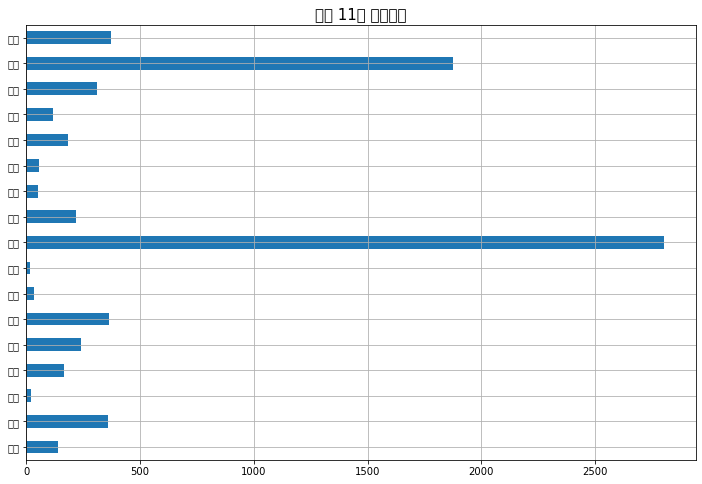

In [44]:
# 11월 확진자수는 바그래프옆으로 눕이기 barh
coronaT['11월'].sort_index(ascending=False).plot(kind='barh', grid=True, figsize=(12,8))
plt.title('전국 11월 확진자수', fontsize=15)
plt.ylabel('')
plt.show()

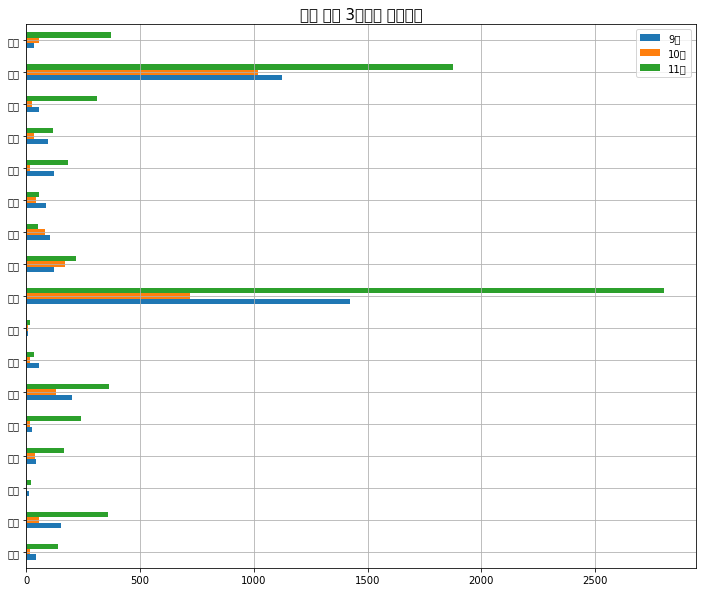

In [45]:
coronaT[['9월','10월','11월']].sort_index(ascending=False).plot(kind='barh', grid=True, figsize=(12,10))
plt.title('시별 최근 3개월간 확진자수', fontsize=15)
plt.ylabel('')
plt.show()

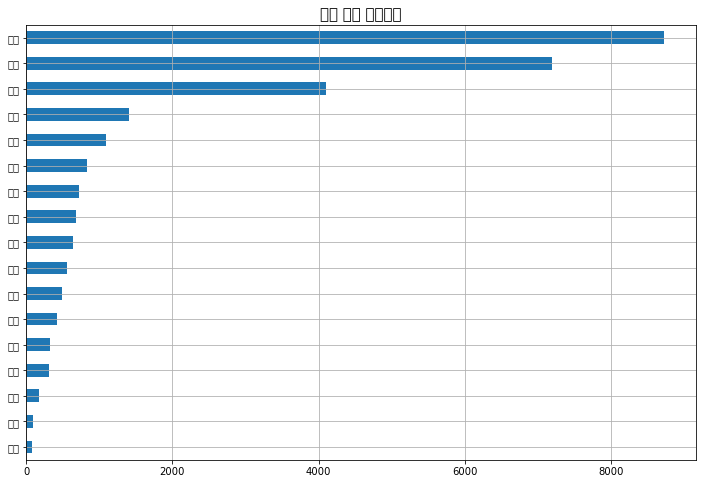

In [46]:
coronaT['합계'].sort_values().plot(kind='barh', grid=True, figsize=(12,8))
plt.title('시별 누적 확진자수', fontsize=15)
plt.ylabel('')
plt.show()

In [47]:
import folium
import json
geo_data = json.load(open('../07.Seoul/data/skorea_municipalities_geo_simple.json',
                         encoding='utf8'))

In [52]:
coronaT_folium = coronaT
coronaT_folium.head()

,3월,4월,5월,6월,7월,8월,9월,10월,11월,합계
서울,362,183,228,452,288,2267,1424,719,2802,8725
부산,34,18,10,7,17,130,120,171,217,724
대구,3552,168,31,23,34,107,85,42,58,4100
인천,57,29,113,135,42,335,200,129,365,1405
대전,23,5,6,71,49,90,105,82,52,483


mapUtil 은 도로명주소에서 ID를 추출하는거라서 쓸모가없음;..   
인덱스를 ID로 잡고  
폴리움 전국지도에 찍어야하나?  

In [54]:
#drawKorea.py모듈활용 카토그램그리기
import cartogram.drawKorea as dk
dk.drawKorea('합계', coronaT, 'Reds')

KeyError: 'y'